In [1]:
import pandas as pd

In [2]:
J = "jaccard_score"
FP = "num_false_positives"
FN = "num_false_negatives"
PRECISION = "precision"
RECALL = "recall"
F1 = "f1_score"
COMPLEXITY = "len_shortest_explanation"
NUMERIC = [J, F1, PRECISION, RECALL, FP, FN, COMPLEXITY]

In [3]:
src_df=pd.read_csv("../data/results.tsv", sep="\t")

In [4]:
src_df.query("completed == False")

,name,completed,task_name,task_type,method,model,description,answers,prompt,completion,...,false_positives,false_negatives,num_false_positives,num_false_negatives,num_true_positives,num_true_negatives,precision,recall,f1_score,len_shortest_explanation


## Filter empty... these should not exist TODO

In [5]:
src_df.query("jaccard_score == 'None'")

,name,completed,task_name,task_type,method,model,description,answers,prompt,completion,...,false_positives,false_negatives,num_false_positives,num_false_negatives,num_true_positives,num_true_negatives,precision,recall,f1_score,len_shortest_explanation


In [28]:
invalid_rows = src_df[pd.to_numeric(src_df['jaccard_score'], errors='coerce').isna()]
invalid_rows

,name,completed,task_name,task_type,method,model,description,answers,prompt,completion,...,false_positives,false_negatives,num_false_positives,num_false_negatives,num_true_positives,num_true_negatives,precision,recall,f1_score,len_shortest_explanation
30,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,True,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,EntailedIndirectSuperClassTask,basic,gpt-3.5-turbo,NaN,"[{'text': 'IndependentContinuant', 'explanatio...",\n\n\nI will provide an ontology as a list of ...,- IndependentContinuant\n- Continuant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,True,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,EntailedIndirectSuperClassTask,explanation,gpt-3.5-turbo,NaN,"[{'text': 'PolyatomicEntity', 'explanations': ...",\n\n\nI will provide an ontology as a list of ...,- PolyatomicEntity [ HeteroatomicMolecularEnt...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,True,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,EntailedIndirectSuperClassTask,chain_of_thought,gpt-3.5-turbo,NaN,"[{'text': 'IndependentContinuant', 'explanatio...",\n\n\nI will provide an ontology as a list of ...,- REASONING: [ IndependentContinuant is an ind...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,EntailedIndirectSuperClassTask-123d8892-187d-4...,True,EntailedIndirectSuperClassTask-123d8892-187d-4...,EntailedIndirectSuperClassTask,basic,gpt-3.5-turbo,NaN,"[{'text': 'Root', 'explanations': None}, {'tex...",\n\n\nI will provide an ontology as a list of ...,- Root\n- OBI:0100026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,EntailedIndirectSuperClassTask-123d8892-187d-4...,True,EntailedIndirectSuperClassTask-123d8892-187d-4...,EntailedIndirectSuperClassTask,explanation,gpt-3.5-turbo,NaN,"[{'text': 'OBI:0100026', 'explanations': [{'ax...",\n\n\nI will provide an ontology as a list of ...,- OBI:0100026 [ Root SubClassOf OBI:0100026 ;...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,EntailedIndirectSuperClassTask-123d8892-187d-4...,True,EntailedIndirectSuperClassTask-123d8892-187d-4...,EntailedIndirectSuperClassTask,chain_of_thought,gpt-3.5-turbo,NaN,"[{'text': 'Root', 'explanations': [{'axioms': ...",\n\n\nI will provide an ontology as a list of ...,- REASONING: [ OBI:0100026 and Root are indire...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,True,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,EntailedIndirectSuperClassTask,basic,gpt-4,NaN,[{'text': 'There is no oio:Subset in the provi...,\n\n\nI will provide an ontology as a list of ...,There is no oio:Subset in the provided ontolog...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,True,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,EntailedIndirectSuperClassTask,explanation,gpt-4,NaN,"[{'text': 'There is no ""oio:Subset"" class ment...",\n\n\nI will provide an ontology as a list of ...,"There is no ""oio:Subset"" class mentioned in th...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,True,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,EntailedIndirectSuperClassTask,chain_of_thought,gpt-4,NaN,"[{'text': 'Unfortunately, there is no ""oio:Sub...",\n\n\nI will provide an ontology as a list of ...,"Unfortunately, there is no ""oio:Subset"" in the...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,EntailedIndirectSuperClassTask-123d8892-187d-4...,True,EntailedIndirectSuperClassTask-123d8892-187d-4...,EntailedIndirectSuperClassTask,basic,gpt-4,NaN,"[{'text': 'BiologicalProcess', 'explanations':...",\n\n\nI will provide an ontology as a list of ...,- BiologicalProcess\n- Occurrent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
invalid_rows.groupby(["model", "task_type"]).count()

,,name,completed,task_name,method,description,answers,prompt,completion,jaccard_score,false_positives,false_negatives,num_false_positives,num_false_negatives,num_true_positives,num_true_negatives,precision,recall,f1_score,len_shortest_explanation
model,task_type,,,,,,,,,,,,,,,,,,,
gpt-3.5-turbo,EntailedIndirectSuperClassTask,6,6,6,6,0,6,6,6,0,0,0,0,0,0,0,0,0,0,0
gpt-4,EntailedIndirectSuperClassTask,6,6,6,6,0,6,6,6,0,0,0,0,0,0,0,0,0,0,0


In [7]:
df = src_df.query("jaccard_score != 'None'")

In [8]:
for c in NUMERIC:
    df[c] = pd.to_numeric(df[c], errors='coerce')

In [9]:
invalid_rows = df[pd.to_numeric(df['jaccard_score'], errors='coerce').isna()]
invalid_rows

,name,completed,task_name,task_type,method,model,description,answers,prompt,completion,...,false_positives,false_negatives,num_false_positives,num_false_negatives,num_true_positives,num_true_negatives,precision,recall,f1_score,len_shortest_explanation
30,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,True,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,EntailedIndirectSuperClassTask,basic,gpt-3.5-turbo,NaN,"[{'text': 'IndependentContinuant', 'explanatio...",\n\n\nI will provide an ontology as a list of ...,- IndependentContinuant\n- Continuant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,True,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,EntailedIndirectSuperClassTask,explanation,gpt-3.5-turbo,NaN,"[{'text': 'PolyatomicEntity', 'explanations': ...",\n\n\nI will provide an ontology as a list of ...,- PolyatomicEntity [ HeteroatomicMolecularEnt...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,True,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,EntailedIndirectSuperClassTask,chain_of_thought,gpt-3.5-turbo,NaN,"[{'text': 'IndependentContinuant', 'explanatio...",\n\n\nI will provide an ontology as a list of ...,- REASONING: [ IndependentContinuant is an ind...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,EntailedIndirectSuperClassTask-123d8892-187d-4...,True,EntailedIndirectSuperClassTask-123d8892-187d-4...,EntailedIndirectSuperClassTask,basic,gpt-3.5-turbo,NaN,"[{'text': 'Root', 'explanations': None}, {'tex...",\n\n\nI will provide an ontology as a list of ...,- Root\n- OBI:0100026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,EntailedIndirectSuperClassTask-123d8892-187d-4...,True,EntailedIndirectSuperClassTask-123d8892-187d-4...,EntailedIndirectSuperClassTask,explanation,gpt-3.5-turbo,NaN,"[{'text': 'OBI:0100026', 'explanations': [{'ax...",\n\n\nI will provide an ontology as a list of ...,- OBI:0100026 [ Root SubClassOf OBI:0100026 ;...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,EntailedIndirectSuperClassTask-123d8892-187d-4...,True,EntailedIndirectSuperClassTask-123d8892-187d-4...,EntailedIndirectSuperClassTask,chain_of_thought,gpt-3.5-turbo,NaN,"[{'text': 'Root', 'explanations': [{'axioms': ...",\n\n\nI will provide an ontology as a list of ...,- REASONING: [ OBI:0100026 and Root are indire...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,True,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,EntailedIndirectSuperClassTask,basic,gpt-4,NaN,[{'text': 'There is no oio:Subset in the provi...,\n\n\nI will provide an ontology as a list of ...,There is no oio:Subset in the provided ontolog...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,True,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,EntailedIndirectSuperClassTask,explanation,gpt-4,NaN,"[{'text': 'There is no ""oio:Subset"" class ment...",\n\n\nI will provide an ontology as a list of ...,"There is no ""oio:Subset"" class mentioned in th...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,True,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,EntailedIndirectSuperClassTask,chain_of_thought,gpt-4,NaN,"[{'text': 'Unfortunately, there is no ""oio:Sub...",\n\n\nI will provide an ontology as a list of ...,"Unfortunately, there is no ""oio:Subset"" in the...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,EntailedIndirectSuperClassTask-123d8892-187d-4...,True,EntailedIndirectSuperClassTask-123d8892-187d-4...,EntailedIndirectSuperClassTask,basic,gpt-4,NaN,"[{'text': 'BiologicalProcess', 'explanations':...",\n\n\nI will provide an ontology as a list of ...,- BiologicalProcess\n- Occurrent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.describe()

,description,jaccard_score,num_false_positives,num_false_negatives,num_true_positives,num_true_negatives,precision,recall,f1_score,len_shortest_explanation
count,0.0,474.000000,474.000000,474.000000,474.000000,0.0,474.000000,474.000000,474.000000,474.000000
mean,NaN,0.485737,0.997890,1.816456,3.221519,NaN,0.625087,0.530358,0.549326,3.645570
std,NaN,0.394209,1.792041,2.686208,3.049188,NaN,0.433537,0.410179,0.401266,2.583267
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,1.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,1.000000
50%,NaN,0.500000,1.000000,1.000000,3.000000,NaN,0.857143,0.600000,0.666667,2.000000
75%,NaN,0.888889,1.000000,2.000000,5.000000,NaN,1.000000,1.000000,0.941176,6.000000
max,NaN,1.000000,15.000000,21.000000,17.000000,NaN,1.000000,1.000000,1.000000,11.000000


In [11]:
df[["task_type"]].drop_duplicates().style.hide()

task_type
EntailedIndirectSuperClassTask
EntailedTransitiveSuperClassTask
MostRecentCommonSubsumerTask
EntailedSubClassOfExpressionTask
OntologyCoherencyTask


In [12]:
df['correct'] = df.apply(lambda row: row.num_false_positives + row.num_false_negatives == 0, axis=1)

In [13]:
GROUPS = ["task_type", "method", "model"]

In [14]:
df.groupby(GROUPS).count()

name   
task_type                        method           model                 
EntailedIndirectSuperClassTask   basic            gpt-3.5-turbo    20  \
                                                  gpt-4            20   
                                 chain_of_thought gpt-3.5-turbo    20   
                                                  gpt-4            20   
                                 explanation      gpt-3.5-turbo    20   
                                                  gpt-4            20   
EntailedSubClassOfExpressionTask basic            gpt-3.5-turbo    20   
                                                  gpt-4            20   
                                 chain_of_thought gpt-3.5-turbo    20   
                                                  gpt-4            20   
                                 explanation      gpt-3.5-turbo    20   
                                                  gpt-4            20   
EntailedTransitiveSuperClassTask basic            gpt-3.5-turbo    19   
                                                  gpt-4            19   
                                 chain_of_thought gpt-3.5-turbo    19   
                                                  gpt-4            19   
                                 explanation      gpt-3.5-turbo    19   
                                                  gpt-4            19   
MostRecentCommonSubsumerTask     basic            gpt-3.5-turbo     2   
                                                  gpt-4             2   
                                 chain_of_thought gpt-3.5-turbo     2   
                                                  gpt-4             2   
                                 explanation      gpt-3.5-turbo     2   
                                                  gpt-4             2   
OntologyCoherencyTask            basic            gpt-3.5-turbo    20   
                                                  gpt-4            20   
                                 chain_of_thought gpt-3.5-turbo    20   
                                                  gpt-4            20   
                                 explanation      gpt-3.5-turbo    20   
                                                  gpt-4            20   

                                                                 completed   
task_type                        method           model                      
EntailedIndirectSuperClassTask   basic            gpt-3.5-turbo         20  \
                                                  gpt-4                 20   
                                 chain_of_thought gpt-3.5-turbo         20   
                                                  gpt-4                 20   
                                 explanation      gpt-3.5-turbo         20   
                                                  gpt-4                 20   
EntailedSubClassOfExpressionTask basic            gpt-3.5-turbo         20   
                                                  gpt-4                 20   
                                 chain_of_thought gpt-3.5-turbo         20   
                                                  gpt-4                 20   
                                 explanation      gpt-3.5-turbo         20   
                                                  gpt-4                 20   
EntailedTransitiveSuperClassTask basic            gpt-3.5-turbo         19   
                                                  gpt-4                 19   
                                 chain_of_thought gpt-3.5-turbo         19   
                                                  gpt-4                 19   
                                 explanation      gpt-3.5-turbo         19   
                                                  gpt-4                 19   
MostRecentCommonSubsumerTask     basic            gpt-3.5-turbo          2   
                                                  gpt-4                  2   
            

In [15]:
df.groupby(GROUPS).max(numeric_only=True)

completed   
task_type                        method           model                      
EntailedIndirectSuperClassTask   basic            gpt-3.5-turbo       True  \
                                                  gpt-4               True   
                                 chain_of_thought gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 explanation      gpt-3.5-turbo       True   
                                                  gpt-4               True   
EntailedSubClassOfExpressionTask basic            gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 chain_of_thought gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 explanation      gpt-3.5-turbo       True   
                                                  gpt-4               True   
EntailedTransitiveSuperClassTask basic            gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 chain_of_thought gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 explanation      gpt-3.5-turbo       True   
                                                  gpt-4               True   
MostRecentCommonSubsumerTask     basic            gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 chain_of_thought gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 explanation      gpt-3.5-turbo       True   
                                                  gpt-4               True   
OntologyCoherencyTask            basic            gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 chain_of_thought gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 explanation      gpt-3.5-turbo       True   
                                                  gpt-4               True   

                                                                 description   
task_type                        method           model                        
EntailedIndirectSuperClassTask   basic            gpt-3.5-turbo          NaN  \
                                                  gpt-4                  NaN   
                                 chain_of_thought gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
                                 explanation      gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
EntailedSubClassOfExpressionTask basic            gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
                                 chain_of_thought gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
                                 explanation      gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
EntailedTransitiveSuperClassTask basic            gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
                                 chain_of_thought gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
                                 explanation      gpt-3.5-turbo          NaN   
                                                

In [16]:
df.groupby(GROUPS).min(numeric_only=True)

completed   
task_type                        method           model                      
EntailedIndirectSuperClassTask   basic            gpt-3.5-turbo       True  \
                                                  gpt-4               True   
                                 chain_of_thought gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 explanation      gpt-3.5-turbo       True   
                                                  gpt-4               True   
EntailedSubClassOfExpressionTask basic            gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 chain_of_thought gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 explanation      gpt-3.5-turbo       True   
                                                  gpt-4               True   
EntailedTransitiveSuperClassTask basic            gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 chain_of_thought gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 explanation      gpt-3.5-turbo       True   
                                                  gpt-4               True   
MostRecentCommonSubsumerTask     basic            gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 chain_of_thought gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 explanation      gpt-3.5-turbo       True   
                                                  gpt-4               True   
OntologyCoherencyTask            basic            gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 chain_of_thought gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 explanation      gpt-3.5-turbo       True   
                                                  gpt-4               True   

                                                                 description   
task_type                        method           model                        
EntailedIndirectSuperClassTask   basic            gpt-3.5-turbo          NaN  \
                                                  gpt-4                  NaN   
                                 chain_of_thought gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
                                 explanation      gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
EntailedSubClassOfExpressionTask basic            gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
                                 chain_of_thought gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
                                 explanation      gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
EntailedTransitiveSuperClassTask basic            gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
                                 chain_of_thought gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
                                 explanation      gpt-3.5-turbo          NaN   
                                                

In [24]:
df.groupby(GROUPS).mean(numeric_only=True)

completed   
task_type                        method           model                      
EntailedIndirectSuperClassTask   basic            gpt-3.5-turbo        1.0  \
                                                  gpt-4                1.0   
                                 chain_of_thought gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
                                 explanation      gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
EntailedSubClassOfExpressionTask basic            gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
                                 chain_of_thought gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
                                 explanation      gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
EntailedTransitiveSuperClassTask basic            gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
                                 chain_of_thought gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
                                 explanation      gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
MostRecentCommonSubsumerTask     basic            gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
                                 chain_of_thought gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
                                 explanation      gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
OntologyCoherencyTask            basic            gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
                                 chain_of_thought gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   
                                 explanation      gpt-3.5-turbo        1.0   
                                                  gpt-4                1.0   

                                                                 description   
task_type                        method           model                        
EntailedIndirectSuperClassTask   basic            gpt-3.5-turbo          NaN  \
                                                  gpt-4                  NaN   
                                 chain_of_thought gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
                                 explanation      gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
EntailedSubClassOfExpressionTask basic            gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
                                 chain_of_thought gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
                                 explanation      gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
EntailedTransitiveSuperClassTask basic            gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
                                 chain_of_thought gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
                                 explanation      gpt-3.5-turbo          NaN   
                                                

In [22]:
main_summary_table = df.groupby(GROUPS).mean(numeric_only=True).reset_index()
print(main_summary_table[ GROUPS + [F1]].to_markdown("main_summary_table.md", index=False))
main_summary_table

None


,task_type,method,model,completed,description,jaccard_score,num_false_positives,num_false_negatives,num_true_positives,num_true_negatives,precision,recall,f1_score,len_shortest_explanation,correct
0,EntailedIndirectSuperClassTask,basic,gpt-3.5-turbo,1.0,NaN,0.632838,1.777778,1.666667,4.777778,NaN,0.746681,0.810311,0.739145,5.888889,0.150000
1,EntailedIndirectSuperClassTask,basic,gpt-4,1.0,NaN,0.901136,0.222222,0.777778,5.666667,NaN,0.971930,0.926936,0.940078,5.888889,0.600000
2,EntailedIndirectSuperClassTask,chain_of_thought,gpt-3.5-turbo,1.0,NaN,0.465090,1.166667,3.722222,2.722222,NaN,0.688624,0.569378,0.587469,5.888889,0.100000
3,EntailedIndirectSuperClassTask,chain_of_thought,gpt-4,1.0,NaN,0.743750,0.333333,2.722222,3.722222,NaN,0.926852,0.761562,0.814255,5.888889,0.450000
4,EntailedIndirectSuperClassTask,explanation,gpt-3.5-turbo,1.0,NaN,0.439266,3.111111,3.222222,3.222222,NaN,0.580952,0.656770,0.561746,5.888889,0.100000
5,EntailedIndirectSuperClassTask,explanation,gpt-4,1.0,NaN,0.719877,0.666667,2.111111,4.333333,NaN,0.901014,0.783520,0.813462,5.888889,0.250000
6,EntailedSubClassOfExpressionTask,basic,gpt-3.5-turbo,1.0,NaN,0.630393,0.400000,1.850000,3.300000,NaN,0.886111,0.654058,0.718349,1.000000,0.300000
7,EntailedSubClassOfExpressionTask,basic,gpt-4,1.0,NaN,0.782379,0.200000,1.400000,3.750000,NaN,0.984615,0.797763,0.843523,1.000000,0.500000
8,EntailedSubClassOfExpressionTask,chain_of_thought,gpt-3.5-turbo,1.0,NaN,0.515374,0.650000,2.750000,2.400000,NaN,0.864583,0.533802,0.623445,1.000000,0.250000
9,EntailedSubClassOfExpressionTask,chain_of_thought,gpt-4,1.0,NaN,0.550440,0.150000,2.500000,2.650000,NaN,0.977500,0.559758,0.664346,1.000000,0.200000


In [18]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

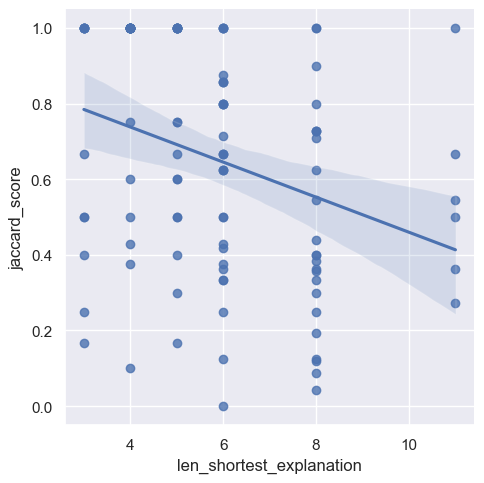

In [19]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
sns.lmplot(x=COMPLEXITY, y=J, data=df.query("task_type == 'EntailedIndirectSuperClassTask'"))
plt.show()

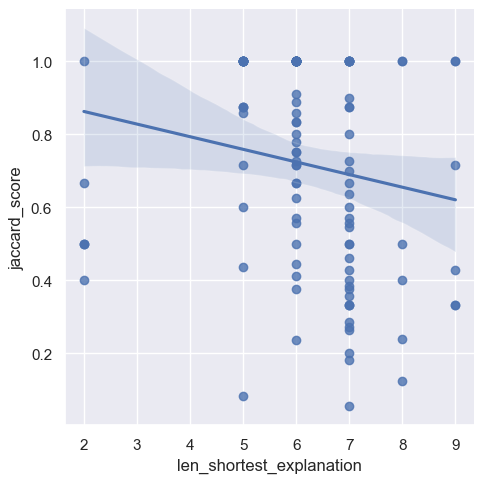

In [20]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
sns.lmplot(x=COMPLEXITY, y=J, data=df.query("task_type == 'EntailedTransitiveSuperClassTask'"))
plt.show()

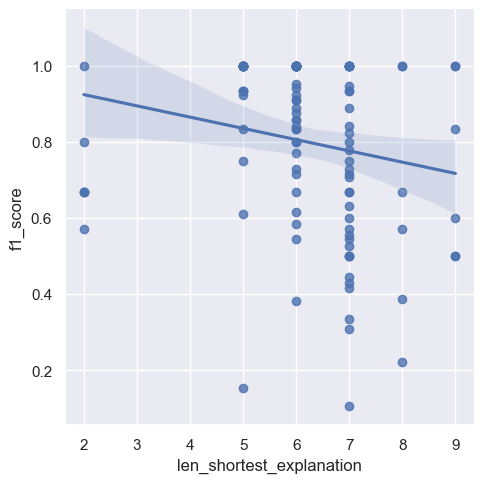

In [21]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
sns.lmplot(x=COMPLEXITY, y=F1, data=df.query("task_type == 'EntailedTransitiveSuperClassTask'"))
plt.show()

## GPT-4 performance on transitivity task does not degrade with complexity

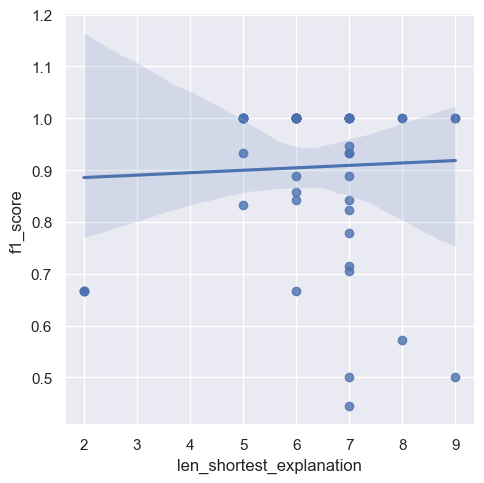

In [26]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
sns.lmplot(x=COMPLEXITY, y=F1, data=df.query("task_type == 'EntailedTransitiveSuperClassTask' and model == 'gpt-4'"))
plt.show()

Note: many of the dots are multiple data points with the same values; GPT-4 frequently gives the same results for the same task across all 3 methods

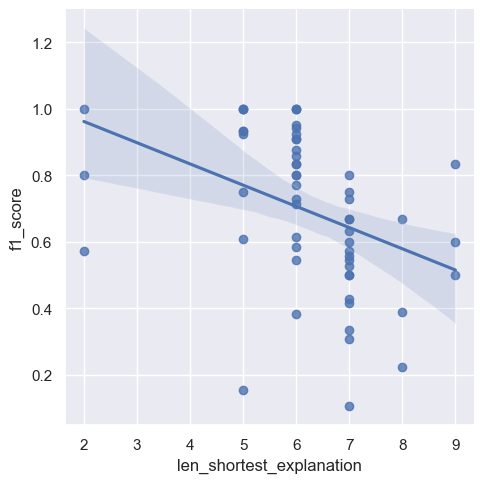

In [27]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
sns.lmplot(x=COMPLEXITY, y=F1, data=df.query("task_type == 'EntailedTransitiveSuperClassTask' and model == 'gpt-3.5-turbo'"))
plt.show()

<Axes: xlabel='len_shortest_explanation', ylabel='f1_score'>

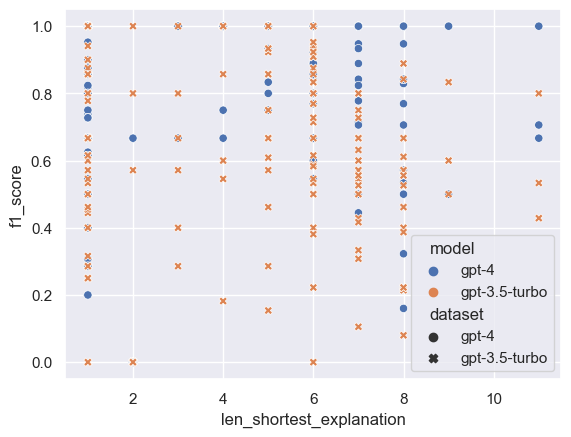

In [25]:
dftups = [(model, df.query(f"model=='{model}'")) for model in ["gpt-4", "gpt-3.5-turbo"]]
for m, mdf in dftups:
    mdf.assign(dataset=m)
concatenated = pd.concat([mdf.assign(dataset=m) for m, mdf in dftups])
sns.scatterplot(x=COMPLEXITY, y=F1, data=concatenated, style='dataset', hue='model')

In [33]:
df.query("task_type == 'EntailedTransitiveSuperClassTask' and model == 'gpt-4' and len_shortest_explanation == 2")

,name,completed,task_name,task_type,method,model,description,answers,prompt,completion,...,false_negatives,num_false_positives,num_false_negatives,num_true_positives,num_true_negatives,precision,recall,f1_score,len_shortest_explanation,correct
357,EntailedTransitiveSuperClassTask-c256405a-455c...,True,EntailedTransitiveSuperClassTask-c256405a-455c...,EntailedTransitiveSuperClassTask,basic,gpt-4,NaN,"[{'text': 'Process', 'explanations': None}, {'...",\n\n\nI will provide an ontology as a list of ...,- Process\n- Occurrent\n- IndependentContinuan...,...,[],2.0,0.0,2.0,NaN,0.5,1.0,0.666667,2.0,False
358,EntailedTransitiveSuperClassTask-c256405a-455c...,True,EntailedTransitiveSuperClassTask-c256405a-455c...,EntailedTransitiveSuperClassTask,explanation,gpt-4,NaN,"[{'text': 'Process', 'explanations': [{'axioms...",\n\n\nI will provide an ontology as a list of ...,- Process [ MolecularFunction SubClassOf Proc...,...,[],2.0,0.0,2.0,NaN,0.5,1.0,0.666667,2.0,False
359,EntailedTransitiveSuperClassTask-c256405a-455c...,True,EntailedTransitiveSuperClassTask-c256405a-455c...,EntailedTransitiveSuperClassTask,chain_of_thought,gpt-4,NaN,"[{'text': 'Occurrent', 'explanations': [{'axio...",\n\n\nI will provide an ontology as a list of ...,- REASONING: [ Occurrent is an entailed superc...,...,[],2.0,0.0,2.0,NaN,0.5,1.0,0.666667,2.0,False


In [34]:
df.query("task_type == 'EntailedTransitiveSuperClassTask' and model == 'gpt-3.5-turbo' and len_shortest_explanation == 2")

,name,completed,task_name,task_type,method,model,description,answers,prompt,completion,...,false_negatives,num_false_positives,num_false_negatives,num_true_positives,num_true_negatives,precision,recall,f1_score,len_shortest_explanation,correct
114,EntailedTransitiveSuperClassTask-c256405a-455c...,True,EntailedTransitiveSuperClassTask-c256405a-455c...,EntailedTransitiveSuperClassTask,basic,gpt-3.5-turbo,NaN,"[{'text': 'Process', 'explanations': None}, {'...",\n\n\nI will provide an ontology as a list of ...,- Process \n- Occurrent \n- IndependentContinuant,...,[],1.0,0.0,2.0,NaN,0.666667,1.0,0.800000,2.0,False
115,EntailedTransitiveSuperClassTask-c256405a-455c...,True,EntailedTransitiveSuperClassTask-c256405a-455c...,EntailedTransitiveSuperClassTask,explanation,gpt-3.5-turbo,NaN,"[{'text': 'Occurrent', 'explanations': [{'axio...",\n\n\nI will provide an ontology as a list of ...,- Occurrent [ MolecularFunction SubClassOf Pr...,...,[],0.0,0.0,2.0,NaN,1.000000,1.0,1.000000,2.0,True
116,EntailedTransitiveSuperClassTask-c256405a-455c...,True,EntailedTransitiveSuperClassTask-c256405a-455c...,EntailedTransitiveSuperClassTask,chain_of_thought,gpt-3.5-turbo,NaN,"[{'text': 'Process', 'explanations': [{'axioms...",\n\n\nI will provide an ontology as a list of ...,- REASONING: [ Process is an entailed supercla...,...,[],3.0,0.0,2.0,NaN,0.400000,1.0,0.571429,2.0,False
